# Лабораторная работа 7: задача Коши

### Задание 1: решить дифференциальное уравнение методом Тейлора 2 порядка

*Задана задача Коши: $
\begin{gather}
   y'(x)=f(x,y(x)), x\in(a,b)\\
  y(a)=y_0
\end{gather}
$*

$y(x) - $ вектор: $y(x)=(y_1(x),\ldots,y_n(x))$, $y_0 - $заданный начальный вектор

При численном решении ищется последовательность векторов $ \lbrace y_n \rbrace $, являющихся приближениями для значений решения $ \lbrace y(x_n) \rbrace$ на множестве точек сетки $w_N= \lbrace x_i: x_{i+1}=x_i+h_i, (i=0,1,\ldots,N-1), x_0=a, x_N=b \rbrace$, где $h_i - $шаг сетки (будем считать его постоянным и равным $h$)

Метод Тейлора приближенного решения в точке $x_{n+1}$ основан на разложении решения в ряд Тейлора в точке $x_n$ по степеням шага $h$. Далее, в зависимости от порядка метода, ряд обрывают на некотором слагаемом.

Так, для метода Тейлора 2 порядка, получим: $y(x_{n+1}) = y(x_n) + h \cdot y'(x_n) + \frac{h^2}{2!} \cdot y''(x_n)$, где $y'(x)=f(x,y(x)), y''(x)=\frac{df}{dx}$ и т.д.

Задачу Коши для уравнения p-го порядка, разрешенного относительно старшей производной 
\begin{gather}
   y^{(p)}(x)=f(x,y(x),y'(x),y''(x)...y^{p-1}(x)), x\in(a,b)\\
  y(a)=\beta_1; y'(a)=\beta_2; y''(a)=\beta_3...y^{p-1}(a)=\beta_p
\end{gather}
сводят введением новых функций $y^i=y^{(i-1)}, i= 1 \cdots p$ к эквивалентной задаче Коши для системы первого порядка
\begin{gather}
    \frac{d}{dx} y'(x)=y^{i+1}(x), i = 1...p \\
    \frac{d}{dx} y^p(x)=f(x,y^1(x),y^2(x)...y^p(x)) \\
  y(a)=\beta_1; y^1(a)=\beta_2; y^2(a)=\beta_3...y^p(a)=\beta_p
\end{gather}

Метод разложения в ряд Тейлора можно применить покомпонентно. Аименно, разложим каждую из функций $y^i(x), i = 1...p$ в ряд Тейлора в окрестности точки $x_n$. В векторной записи: $y_{n+1}=y_n+h(f(x_n,y_n)+\frac{h}{2} f'(x_n,y_n))$, где $f'(x,y)=f'_x(x,y)+J(x,y)f(x,y) $, $J(x,y)$ -матрица Якоби

In [1]:
import numpy as np
from math import exp,sin,cos,sqrt
from scipy import *
from scipy.linalg import *
from sympy import *
init_printing()
import matplotlib.pyplot as plt
import pylab

Дифференциальное уравнение $y''+y=x \cdot e^{-x}, y(0)=1; y'(0)=0$ сводится к системе:
\begin{gather}
   y'_1=y_2\\
   y'_2=-y_1+x \cdot e^{-x} \\
  y_1(0)=1;  y_2(0)=0
\end{gather}

In [2]:
#система
def fm(x,y1,y2):
    z=y2
    r=-y1+x*exp(-x)
    return z,r
x=Symbol('x')
y1=Symbol('y1')
y2=Symbol('y2')

In [27]:
#метод
def F(f,x00,y0,y01,h):
    n=0
    p1=np.zeros([2,1])
    A=np.zeros([2,1])
    while True:
        x0=x00
        p0=np.array([[y0],[y01]])
        n=n+1
        X=[x0]
        Y=[y0]
        Y1=[y01]
        S=[y0]
        j=1
        while x0>=0 and x0<=(12-h):
            a=diff(f(x,y1,y2)[0],y1).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            c=diff(f(x,y1,y2)[0],y2).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            d=diff(f(x,y1,y2)[1],y1).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            q=diff(f(x,y1,y2)[1],y2).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
            B=np.array([[a,c],[d,q]])
            for i in range(2):
                A[i][0]=diff(f(x,y1,y2)[i],x).evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
                e=f(x,y1,y2)[i].evalf(subs={x:x0,y1:p0[0][0],y2:p0[1][0]})
                p1[i]=e
            p2=A+dot(B,p1)    
            pn=p0+h*p1+0.5*p2*h**2
            p0=pn
            x0=x0+h
            X.append(x0)
            Y.append(pn[0][0])
            Y1.append(pn[1][0])
            j=j+1
            if j%2!=0:
                S.append(pn[0][0])
                
        h=h*0.5    
        S=np.array(S,dtype=np.double)
        if n!=1:
            Yp= np.array(Yp,dtype=np.double)
            if  max(abs(S-Yp))<0.01 or  n==10 :
                #print(norm(S-Yp)/norm(Yp),n)
                #print(max(abs(S-Yp)))
                print(n)
                break
        Yp=Y
    return X,Y,Y1
C,D,E=F(fm,0,1,0,1)

5


*графики численного решения и аналитического*

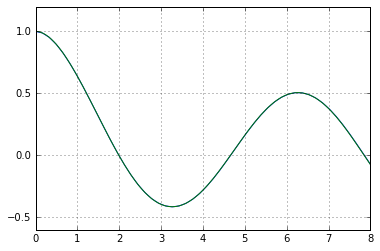

In [23]:
#график решения
% matplotlib inline
def Fx(x):
    z=cos(x)/2+x*exp(-x)/2+exp(-x)/2
    return z               
xnew=np.linspace(0,8,50)
ynew=[Fx(i) for i in xnew]
plt.plot(xnew,ynew,C,D)
plt.grid(True)
plt.show()


*график разности численного решени и аналитического*

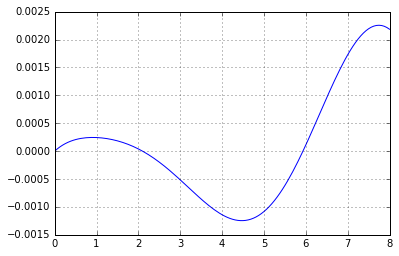

In [24]:
#график разности
ys=[Fx(i) for i in C]
my=np.array(ys)
mD=np.array(D)
dy=my-mD
plt.plot(C,dy)
plt.grid(True)
plt.show()

*Производная от аналитического решения*

*графики производных решения*

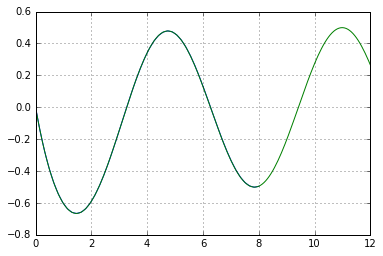

In [28]:
def dFx(x):
    z= -x/2*exp(-x)-sin(x)/2
    return z             
xnew=np.linspace(0,8,50)
dynew=[dFx(i) for i in xnew]
plt.plot(xnew,dynew,C,E)
plt.grid(True)
plt.show()

*Фазовая плоскость, полученная численно*

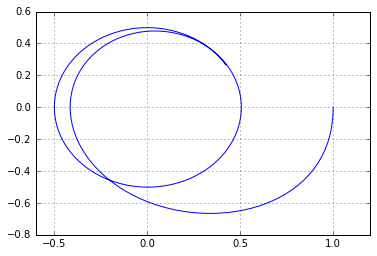

In [29]:
#фазовая плоскать
plt.plot(D,E)
plt.grid(True)
plt.show()

*Фазовая плоскость, полученная численно и аналитически*

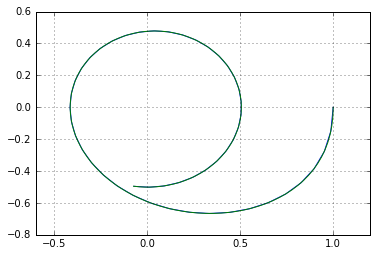

In [17]:
plt.plot(ynew,dynew,D,E)
plt.grid(True)
plt.show()

### Задание 2: решение ДУ методом Рунге-Кутты кратности 5

Идея этих методов Рунге-Кутты заключается в построении функций $ϕ$, которые не используют явно производных функции $f(x, y)$ и в то же время ”наилучшим образом” приближают соответствующие отрезки  ряда Тейлора.Процесс ”подгонки” рядов Тейлора можно продолжить, строя функции $ϕ(x, y, h)$, использующие все большие отрезки ряда Тейлора. Подобым образом получают m-кратные явные методы Рунге-Кутты


Например, для явного пятикратного метода:


\begin{gather}
   y_{n+1} = y_n + \frac{h}{2}(k_1 + 4k_4 + k_5)\\
   k_1 = \frac{1}{3}f(x_n, y_n) \\
   k_2 =\frac{1}{3} f(x_n +\frac{h}{2}, y_n + hk_1) \\
   k_3 =\frac{1}{3} f(x_n +\frac{h}{2}, y_n + \frac{h}{2}k_1+\frac{h}{2}k_2) \\
   k_4 = \frac{1}{3} f(x_n+\frac{h}{2}, y_n+\frac{3h}{8}k_1+\frac{9h}{8}k_3) \\
   k_5 =  \frac{1}{3}  f(x_n+h, y_n +\frac{3h}{2}k_1-\frac{9h}{2}k_3+6hk_1)
\end{gather}

In [18]:
#Рунге-Кутта-5
def R(f,x00,y0,y01,h):
    k1=np.zeros([2,1])
    k2=np.zeros([2,1])
    k3=np.zeros([2,1])
    k4=np.zeros([2,1])
    k5=np.zeros([2,1])
    n=0
    while True:
        x0=x00
        p0=np.array([[y0],[y01]])
        n=n+1
        X=[x0]
        Y=[y0]
        Y1=[y01]
        S=[y0]
        j=1
        while x0>=0 and x0<=(8-h):
            for i in range(2):
                k1[i][0]=f(x0,p0[0][0],p0[1][0])[i]/3
                k2[i][0]=f(x0+h/3,p0[0][0]+h/2*k1[i][0],p0[1][0]+h/2*k1[i][0])[i]/3
                k3[i][0]=f(x0+h/3,p0[0][0]+h/2*k1[i][0]+h/2*k2[i][0],p0[1][0]+h/2*k1[i][0]+h/2*k2[i][0])[i]/3
                k4[i][0]=f(x0+h/2,p0[0][0]+3/8*h*k1[i][0]+9/8*h*k3[i][0],p0[1][0]+3/8*h*k1[i][0]+9/8*h*k3[i][0])[i]/3
                k5[i][0]=f(x0+h,p0[0][0]+3/2*h*k1[i][0]-9/2*h*k3[i][0]+6*h*k4[i][0],p0[1][0]+3/2*h*k1[i][0]-9/2*h*k3[i][0]+6*h*k4[i][0])[i]/3
            pn=p0+0.5*h*(k1+4*k4+k5)
            p0=pn
            x0=x0+h
            X.append(x0)
            Y.append(pn[0][0])
            Y1.append(pn[1][0])
            j=j+1
            if j%2!=0:
                S.append(pn[0][0])
                
        h=h*0.5    
        S=np.array(S,dtype=np.double)
        if n!=1:
            Yp= np.array(Yp,dtype=np.double)
            if max(abs(S-Yp))<0.01 or n==15:
                print(n)
                break
        Yp=Y
    return X,Y,Y1
        
        
Cr,Dr,Er=R(fm,0,1,0,1)        

9


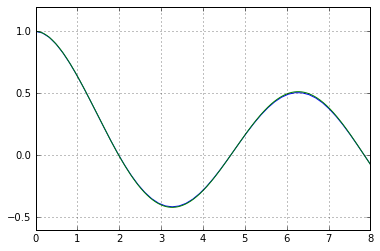

In [19]:
def Fx(x):
    z=cos(x)/2+x*exp(-x)/2+exp(-x)/2
    return z            
xnew=np.linspace(0,8,50)
ynew=[Fx(i) for i in xnew]
plt.plot(xnew,ynew,Cr,Dr)
plt.grid(True)
plt.show()

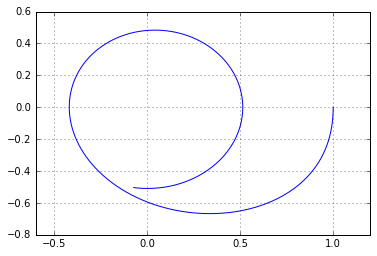

In [20]:
#фазовая плоскать
plt.plot(Dr,Er)
plt.grid(True)
plt.show()

#### Выполнил Квашенников Дмитрий. 431 группа